# Модуль 2: Основы нейронных сетей

## Теория

### Основные понятия
Что такое нейрон, слой, активация?

Определения:
1. Нейрон - это вычислительная единица, которая получает информацию, производит над ней простые вычисления и передает ее дальше. У каждого нейрона есть 2 параметра: входные данные (input data), выходные данные (output data). Типы нейронов: входной нейрон (input = output), скрытый нейрон - нейрон на промежуточном слое между входными и выходными нейронами (input data = суммарная информация всех нейронов с предыдущего слоя).
2. Слой - нейросеть состоит из большого количества нейронов. Нейроны одного типа объединяются в группу. Это и называется слоем.
3. Активация (функция активации) - функция преобразовывает линейную зависимость во входных данных в нелинейную. Это ее главная задача. Поскольку на линейной зависимости сеть не обучится. Вот ее формула: $activation_func(sum(weight * inputs + bias))$. Популярные функции активации: 
 - ReLU - $E(f) = [0, \infty)$ - уменьшение проблемы исчезающего градиента;
 - Sigmoid - $E(f) = [0, 1]$ - бинарная классификация;
 - Softmax - принимает список произвольных чисел и преобразует их в список вероятностей пропорциональных этим числам. Например, на вход подается список [1, 2, 3]. Тогда: $softmax([1, 2, 3]) = [0.09, 0.244, 0.665]$ - многоклассовая классификация;
 - Tanh - $E(f) = [-1, 1]$ - выходные значения tanh находятся в диапазоне от -1 до 1, что делает ее центрированной относительно нуля. Это выгодно, поскольку это может помочь процессу обучения, так как данные, проходящие через сеть, в среднем будут поддерживать среднее значение близкое к 0, что в свою очередь помогает оптимизации методом градиентного спуска. tanh часто используется в скрытых слоях.
 - Binary Step Function (ступенчатая) - первая использованная функция активации в контексте нейронных сетей. В наше время функция не часто используется в современных нейронных сетях, потому что она не дифференцируема на пороге $\theta$, что делает ее непригодной для использования с обратным распространением ошибки (методом, используемым для обучения нейронных сетей).
 $$
 f(x)=
 \begin{cases}
 0 & \quad \text{if $x < \theta$}\\ 
 1 & \quad \text{if $x \geq \theta$}
 \end{cases}
 $$

### Определение процессов

1. Обучение: Процесс настройки весов нейронной сети с использованием алгоритма обратного распространения ошибки (backpropagation) и оптимизации.
2. Переобучение (overfitting): Ситуация, когда модель слишком хорошо подстраивается под обучающие данные и плохо работает на новых данных.

### Важные определения для обучения модели

1. Функция потерь (Loss Function) - это математическая функция, которая измеряет, насколько хорошо модель предсказывает целевые значения. Она вычисляет разницу между предсказанными значениями моделью и фактическими значениями целевых переменных. Примеры:
 - Mean Squared Error (MSE): Используется для регрессионных задач, вычисляет среднюю квадратную ошибку между предсказанными и фактическими значениями.
- Cross-Entropy Loss: Используется для задач классификации, измеряет несоответствие между предсказанным вероятностным распределением и истинным распределением.

2. Оптимизатор — это алгоритм, который обновляет веса нейронной сети на основе градиента функции потерь. Он помогает находить минимальные значения функции потерь, которые означают хорошее предсказание моделью. Примеры оптимизаторов:
- Stochastic Gradient Descent (SGD): Обновляет веса, основываясь на одном или нескольких примерах из обучающего набора данных.
- Adam (Adaptive Moment Estimation): Комбинирует преимущества двух других методов: адаптивной скорости обучения и использование момента. Обычно работает лучше, особенно с глубокими сетями.

### Процесс обучения модели нейросети

Цель: подобрать веса модели, при которых функция потерь будет минимальной!
  
Итерация обучения модели состоит из шагов:
1. Прямое распространение (Forward Pass): Входные данные передаются через нейронную сеть, где каждый слой обрабатывает данные до тех пор, пока не будет получен финальный выход.
2. Вычисление функции потерь: После прямого распространения рассчитывается значение функции потерь, которое показывает, насколько хорошо модель справляется с этой задачей.
3. Обратное распространение (Backward Pass): Процесс, в котором вычисляются градиенты функции потерь по отношению к весам модели. Это позволяет понять, как изменять веса, чтобы уменьшить ошибку.
4. Обновление весов: Оптимизатор использует градиенты, чтобы обновить веса модели. Это повторяется многократно, пока не будет достигнуто приемлемое значение функции потерь.

## Задачи

In [43]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms
import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.metrics import precision_score, recall_score, f1_score

from typing import Dict

In [2]:
# Указание в качестве девайса GPU если доступна
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [59]:
# Загрузка данных
train_data = datasets.MNIST(
    root="../data",
    train=True,
    download=True,
    transform=ToTensor())

test_data = datasets.MNIST(
    root="../data",
    train=False,
    download=True,
    transform=ToTensor())


In [60]:
# Создание DataLoaders
train_dataloader = DataLoader(
    train_data,
    batch_size=16,
    shuffle=True)

test_dataloader = DataLoader(
    test_data,
    batch_size=16,
    shuffle=True)


### Функции для обучения нейросети и визуализации результатов

In [56]:
# Класс обучения нейросети
def train_nn(
    model: nn.Module,
    train_loader: DataLoader,
    test_loader: DataLoader,
    optimizer: torch.optim,
    criterion: nn.Module,
    num_epochs: int = 5,
    device: str = "cuda"
):
    # Загружаем модель на CUDA (GPU)
    model.to(device)

    all_train_losses = []
    all_test_losses = []
    all_test_predicts = []
    all_test_targets = []
    # Списки для хранения метрик
    test_precisions = []
    test_recalls = []
    test_f1_s = []

    for epoch in range(num_epochs):
        total_train_loss = 0
        total_test_loss = 0
        # Обучение на тренировочных данных
        for data, targets in train_loader:
            # Переводим модель в режим обучения
            model.train()
            # Перенос данных на CUDA (GPU)
            data, targets = data.to(device), targets.to(device)
            
            # Обнуление градиентов
            optimizer.zero_grad()

            outputs = model(data) # Прямое распространение
            loss = criterion(outputs, targets) # Расчет ошибки (функции потерь)

            total_train_loss += loss.item() # Увеличение общей ошибки на итерации
            
            loss.backward() # Обратное распространение
            optimizer.step() # Оптимизатор обновляет веса согласно полученным значением градиентов
        
        # Расчет среднего значения функции потерь для обучающего множества
        avg_train_loss = total_train_loss / len(train_loader)
        all_train_losses.append(avg_train_loss)
        
        # Валидация модели на тестовых данных
        # Перевод модели в режим оценки качества
        model.eval()
        with torch.no_grad():
            for data, targets in test_loader:
                # Перенос данных на CUDA (GPU)
                data, targets = data.to(device), targets.to(device)

                outputs = model(data) # Прямое распространение
                loss = criterion(outputs, targets) # Расчет ошибки (функции потерь)

                total_test_loss += loss.item()

                all_test_predicts.extend(outputs.argmax(dim=1).cpu().numpy())
                all_test_targets.extend(targets.cpu().numpy())

        # Расчет среднего значения функции потерь для тестового множества
        avg_test_loss = total_test_loss / len(test_loader)
        all_test_losses.append(avg_test_loss)

        # Расчет метрик на тестовом множестве
        precision = precision_score(all_test_targets, all_test_predicts, average="macro")
        recall = recall_score(all_test_targets, all_test_predicts, average="macro")
        f1 = f1_score(all_test_targets, all_test_predicts, average="macro")

        test_precisions.append(precision)
        test_recalls.append(recall)
        test_f1_s.append(f1)

        print((f"Epoch: {epoch + 1}/{num_epochs}. Train Loss: {avg_test_loss:.3f}. "),
              (f"Pr: {precision:.2f}, R: {recall:.2f}, F1: {f1:.2f}"))
        



    return {"train_losses": all_train_losses, "test_losses": all_test_losses,
            "precisions": test_precisions, "recalls": test_recalls, "f1_s": test_f1_s}
    

In [6]:
def plot_metrics(results: Dict, num_epochs: int):
    """
    Функция для построения графиков метрик: Precision, Recall и F1 по эпохам.
    
    :param results: Словарь с метриками.
    :param num_epochs: Число эпох.
    """
    # Создание фигуры с тремя подграфиками
    figure, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Метрики
    precisions = results["precisions"]
    recalls = results["recalls"]
    f1_scores = results["f1_s"]

    # Эпохи
    epochs = range(1, num_epochs + 1)

    # Построение графиков
    metrics = [precisions, recalls, f1_scores]
    labels = ['Precision', 'Recall', 'F1 Score']
    colors = ['blue', 'orange', 'green']

    for ax, metric, label, color in zip(axes, metrics, labels, colors):
        # Вариант - Прямая линия
        # ax.plot(epochs, metric, marker='o', label=label, color=color)
        # Вариант - Столбчатая диаграмма
        ax.bar(epochs, metric, label=label, color=color, width=0.2, align='center')
        for i, v in enumerate(metric):
            ax.text(epochs[i], v + 0.02, str(round(v, 3)), ha='center', color='black')
        ax.set_xlabel('Эпохи')
        ax.set_ylabel('Значение метрики')
        ax.set_ylim(0, 1)  # Задаем диапазон оси Y от 0 до 1
        ax.set_xticks(epochs)  # Установка меток по оси X
        ax.grid()
    
    # Общая легенда для всех графиков
    figure.legend(labels, loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, 1.1))

    # Общий заголовок для всех графиков
    plt.suptitle('Precision, Recall и F1 Score по эпохам', fontsize=16)

    # Показать график
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Убрать проблемы с нахождением заголовка.
    
    plt.show()


In [7]:
def plot_results(results: Dict):
    train_losses = results["train_losses"]
    test_losses = results["train_losses"]
    _, axes = plt.subplots(2, 1, figsize=(15, 7))
    # Цвета для графиков функций потерь
    colors = ("green", "blue")

    # Подписи к графикам
    axes[0].set_title('Значение функции потерь')
    axes[0].set_xlabel('Эпохи')
    axes[0].set_ylabel('Значение')

    axes[1].set_title('Значение функции потерь')
    axes[1].set_xlabel('Эпохи')
    axes[1].set_ylabel('Значение')
    for i in range(2):
        if i == 0:
            axes[0].plot(train_losses, color=colors[i], label="Train Loss")
        else:
            axes[1].plot(test_losses, color=colors[i], label="Test Loss")
    # Добавляем легенды для графиков 
    axes[0].legend()
    axes[1].legend()

    plot_metrics(results, 5)


### Первая нейронная сеть:
Реализовать простую полносвязную нейронную сеть для задачи классификации MNIST. Использовать один скрытый слой и функцию активации ReLU.

<function matplotlib.pyplot.show(close=None, block=None)>

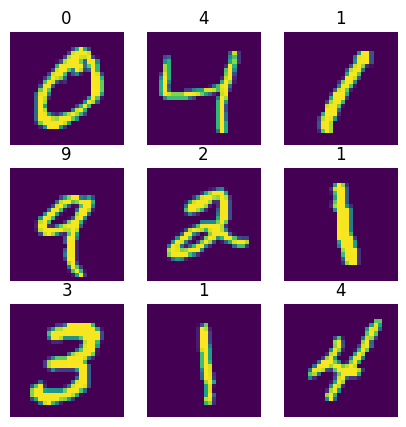

In [ ]:
# Визуализация данных
figure = plt.figure(figsize=(5, 5))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    img, label = train_data[i]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze())

plt.show()

Feature batch shape: torch.Size([16, 1, 28, 28])
Labels batch shape: torch.Size([16])


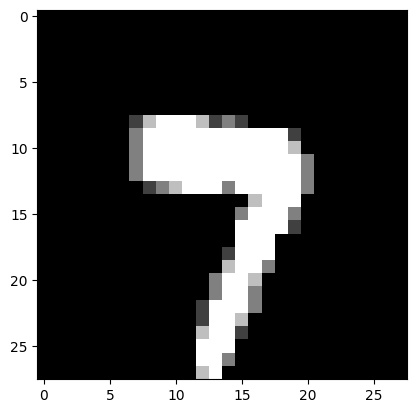

Label: 7


In [6]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [7]:
# Создание модели нейросети
# FCNN (Fully Connected Neural Network) - Полносвязная нейронная сеть (она же MLP - Многослойный перцептрон)
class NeuralNetwork(nn.Module):
    def __init__(self, n_classes):
        super().__init__()

        # Входной слой - перевод из 2D массива в 1D
        self.input_layer = nn.Flatten()
        # Скрытые слои
        self.hidden_1 = nn.Linear(28*28, 512) # Скрытый слой №1
        # Функция активации - переводит линейную связь в нелинейную
        self.activation_func_1 = nn.ReLU()
        
        self.hidden_2 = nn.Linear(512, 512) # Скрытый слой №2
        # Функция активации - переводит линейную связь в нелинейную
        self.activation_func_2 = nn.ReLU()

        # Выходной слой
        self.output_layer = nn.Linear(512, n_classes) # На выходе кол-во классов
        
        # Для удобства собираем все в один контейнер последовательный
        # Это сокращает и улучшает читаемость кода
        self.sequential_container = nn.Sequential(
            self.hidden_1,
            self.activation_func_1,
            self.hidden_2,
            self.activation_func_2,
            self.output_layer
        )

    def forward(self, x):
        # Изображение 2D проходит через входной слой, где преобразовывается в 1D массив
        x = self.input_layer(x)
        # Проход 1D вектора изображения через все слои нейросети
        # На выходе получаем логиты (кол-во логитов = кол-во классов)
        logits = self.sequential_container(x)

        return logits
    

In [11]:
# Создание объекта нейросети
model = NeuralNetwork(10).to(device=device) # сразу переводим модель на GPU
# Определение функции потерь
criterion = nn.CrossEntropyLoss()
# Выбор оптимизатора
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Обучение нейросети
model.train() # Перевод модели в стадию обучения

for epoch in tqdm(range(5)): # Обучение длится 5 эпох
    for data, target in train_dataloader:
        data = data.to(device) # Перенос всех данных на GPU
        target = target.to(device) # Перенос всех данных на GPU
        optimizer.zero_grad() # Обнуляем градиенты
        output = model(data) # Прямое распространение (данные проходят через все слои)
        loss = criterion(output, target) # Вычисление функции потерь
        loss.backward() # Обратное распространение
        optimizer.step()

print("Обучение завершено!")

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:49<00:00,  9.97s/it]

Обучение завершено!


In [ ]:
# Расширение выходной информации об обучении модели
# + визуализация обучения модели
model = NeuralNetwork(10) # Определение модели

criterion = nn.CrossEntropyLoss() # Функция потерь для классификации
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


model.train()
all_losses = []
num_epochs = 5
for epoch in range(num_epochs):
    total_loss = 0
    for data, targets in train_dataloader:
        optimizer.zero_grad() # Обнуление градиентов
        outputs = model(data) # Пропуск данных через модель, на выходе логиты

        loss = criterion(outputs, targets) # Расчет функции потерь
        total_loss += loss.item()
        loss.backward() # Обратное распространение
        optimizer.step() # Оптимизатор обновляет веса согласно полученным значением градиентов
    
    avg_loss = total_loss / len(train_dataloader) # Расчет среднего значения функции потерь на эпохе
    all_losses.append(avg_loss)
    # Вывод информации об обучении на эпохе
    print(f"Epoch {epoch + 1}/{num_epochs}. Loss: {avg_loss:.3f}")
    

Epoch 1/5. Loss: 0.196
Epoch 2/5. Loss: 0.088
Epoch 3/5. Loss: 0.062
Epoch 4/5. Loss: 0.050
Epoch 5/5. Loss: 0.041


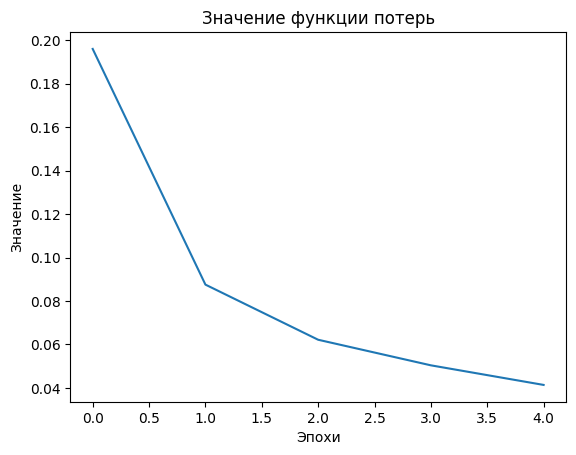

Обучение завершено!


In [14]:
# Визуализация обучения модели
plt.plot(all_losses)
plt.title('Значение функции потерь')
plt.xlabel('Эпохи')
plt.ylabel('Значение')
plt.show()
print('Обучение завершено!')

### Классификация с различными функциями активации:
Перепиши свою модель для использования функций активации Sigmoid, Tanh и Compare performance по метрикам (например, Precision, Recall, F1).

In [5]:
class SigmoidNN(nn.Module):
    """
    Нейросеть в которой в качестве функции активации используется только Sigmoid
    """
    def __init__(self, num_classes):
        super().__init__()
        
        # Входной слой
        self.input_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 512)
        )
        # Скрытые слои
        self.hidden_layers = nn.Sequential(
            nn.Linear(512, 512),
            nn.Sigmoid(),
            nn.Linear(512, 512),
            nn.Sigmoid()
        )
        # Выходной слой
        self.output_layer = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.input_layer(x)
        x = self.hidden_layers(x)
        logits = self.output_layer(x)

        return logits


In [6]:
class TanhNN(SigmoidNN):
    """
    Нейросеть в которой в качестве функции активации используется только Tanh
    """
    def __init__(self, num_classes):
        super().__init__(num_classes=num_classes)

        # Меняем функцию Sigmoid на Tanh
        self.hidden_layers[1], self.hidden_layers[3] = nn.Tanh(), nn.Tanh()


In [8]:
# Обучение модели с Sigmoid
print("Обучение модели SigmoidNN:\n")
sigm_model = SigmoidNN(10)
sigm_optimizer = torch.optim.Adam(sigm_model.parameters())
sigm_criterion = nn.CrossEntropyLoss()
sigm_results = train_nn(
    sigm_model,
    train_dataloader,
    test_dataloader,
    sigm_optimizer,
    sigm_criterion
)


print("=" * 100 + "\n")
print("Обучение модели TanhNN:\n")
# Обучение модели с Tanh
tanh_model = TanhNN(10)
tanh_optimizer = torch.optim.Adam(tanh_model.parameters())
tanh_criterion = nn.CrossEntropyLoss()
tanh_results = train_nn(
    tanh_model,
    train_dataloader,
    test_dataloader,
    tanh_optimizer,
    tanh_criterion
)


Обучение модели SigmoidNN:

Epoch: 1/5. Loss: 0.318. Pr: 0.90, R: 0.90, F1: 0.90
Epoch: 2/5. Loss: 0.172. Pr: 0.92, R: 0.92, F1: 0.92
Epoch: 3/5. Loss: 0.137. Pr: 0.93, R: 0.93, F1: 0.93
Epoch: 4/5. Loss: 0.119. Pr: 0.94, R: 0.94, F1: 0.94
Epoch: 5/5. Loss: 0.105. Pr: 0.95, R: 0.95, F1: 0.95

Обучение модели TanhNN:

Epoch: 1/5. Loss: 0.308. Pr: 0.91, R: 0.91, F1: 0.91
Epoch: 2/5. Loss: 0.195. Pr: 0.92, R: 0.92, F1: 0.92
Epoch: 3/5. Loss: 0.171. Pr: 0.93, R: 0.93, F1: 0.93
Epoch: 4/5. Loss: 0.158. Pr: 0.94, R: 0.94, F1: 0.94
Epoch: 5/5. Loss: 0.152. Pr: 0.94, R: 0.94, F1: 0.94


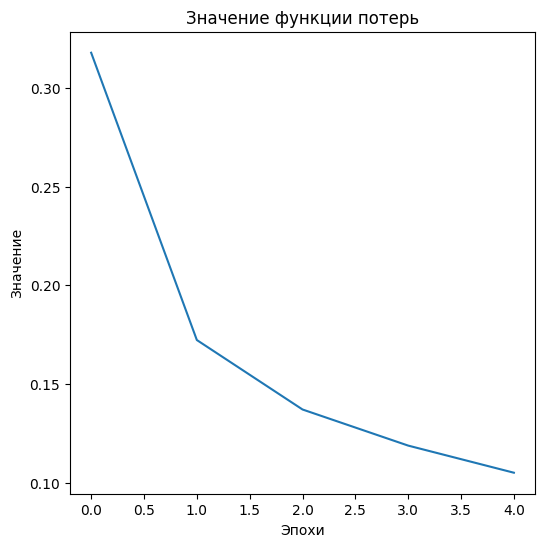

In [16]:
# Визуализация результатов SigmoidNN
plot_train_results(sigm_results)

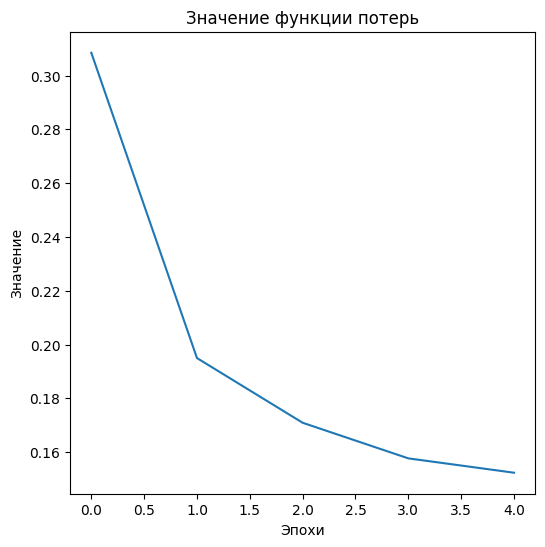

In [17]:
# Визуализация результатов SigmoidNN
plot_train_results(tanh_results)

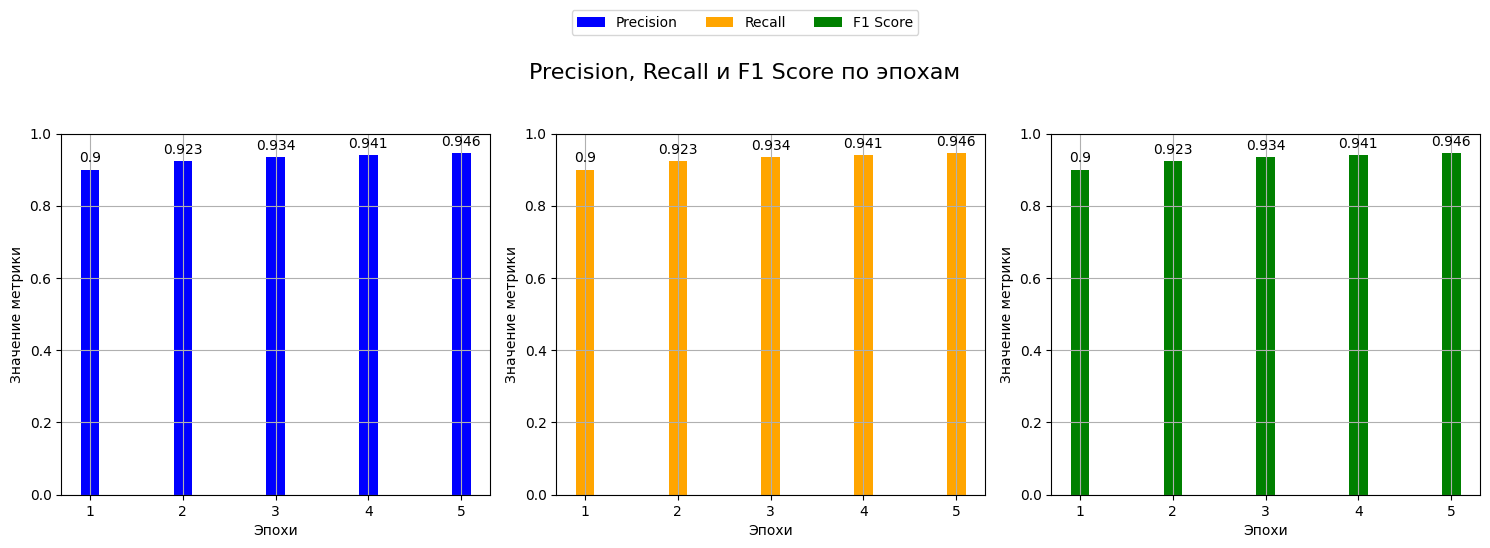

In [35]:
# Метрики SigmoidNN
plot_metrics(sigm_results, 5)

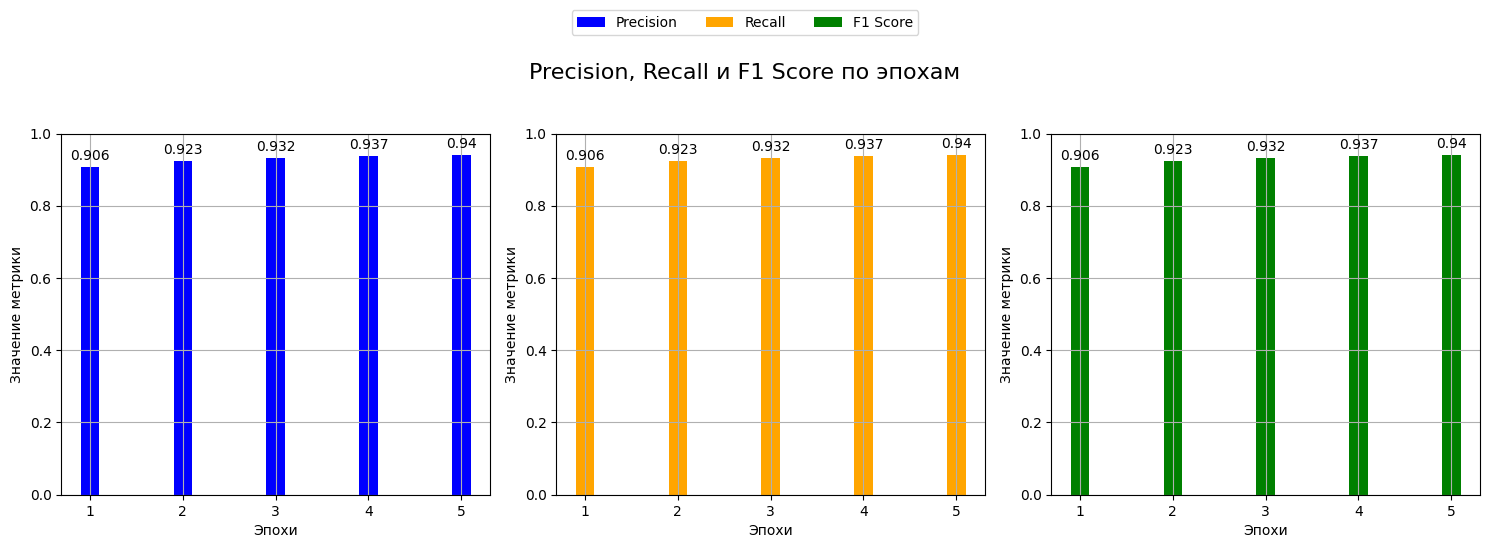

In [36]:
# Метрики SigmoidNN
plot_metrics(tanh_results, 5)

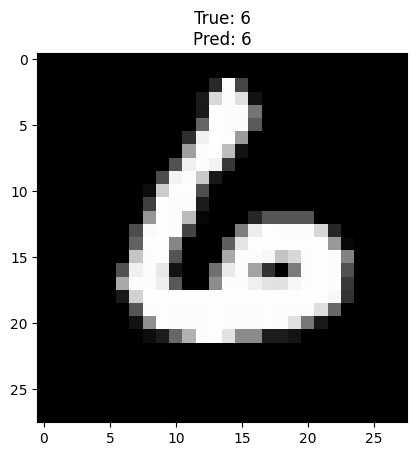

In [41]:
# Пример работы нейросети
sigm_model.eval()

test_features, test_labels = next(iter(test_dataloader))
img = test_features[0].squeeze()
true_label = test_labels[0]
pred_label = sigm_model(test_features[0]).argmax().numpy()
plt.title(f"True: {true_label}\nPred: {pred_label}")
plt.imshow(img, cmap="gray")
plt.show()

### Добавление слоев:
Увеличь количество скрытых слоев в своей модели до трех и экспериментируй с количеством нейронов в них. Проанализируй, как это влияет на производительность.

In [48]:
sigm_model.hidden_layers

Sequential(
  (0): Linear(in_features=512, out_features=512, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): Sigmoid()
)

In [68]:
# Увеличение кол-ва скрытых слоев для SigmoidNN
class NewSigmoidNN(SigmoidNN):
    def __init__(self, num_classes, input_features, output_features):
        super().__init__(num_classes)
        self.hidden_layers.extend(
            [
                nn.Linear(input_features, output_features),
                nn.ReLU(),
                nn.Linear(output_features, output_features),
                nn.ReLU()
            ]
        )
        self.output_layer = nn.Linear(output_features, num_classes)
    

In [69]:
newsigm_model = NewSigmoidNN(10, 512, 256)

newsigm_model_results = train_nn(
    newsigm_model,
    train_dataloader,
    test_dataloader,
    torch.optim.Adam(newsigm_model.parameters()),
    nn.CrossEntropyLoss()
)


Epoch: 1/5. Loss: 0.431. Pr: 0.86, R: 0.86, F1: 0.86
Epoch: 2/5. Loss: 0.208. Pr: 0.90, R: 0.90, F1: 0.90
Epoch: 3/5. Loss: 0.169. Pr: 0.92, R: 0.92, F1: 0.92
Epoch: 4/5. Loss: 0.148. Pr: 0.93, R: 0.93, F1: 0.93
Epoch: 5/5. Loss: 0.132. Pr: 0.93, R: 0.93, F1: 0.93


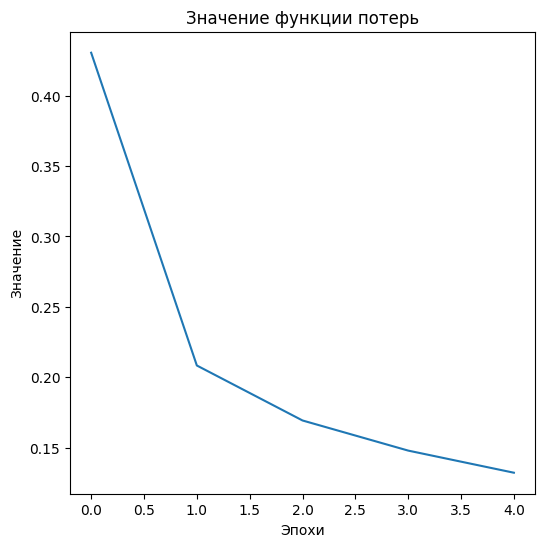

In [71]:
plot_train_results(newsigm_model_results)

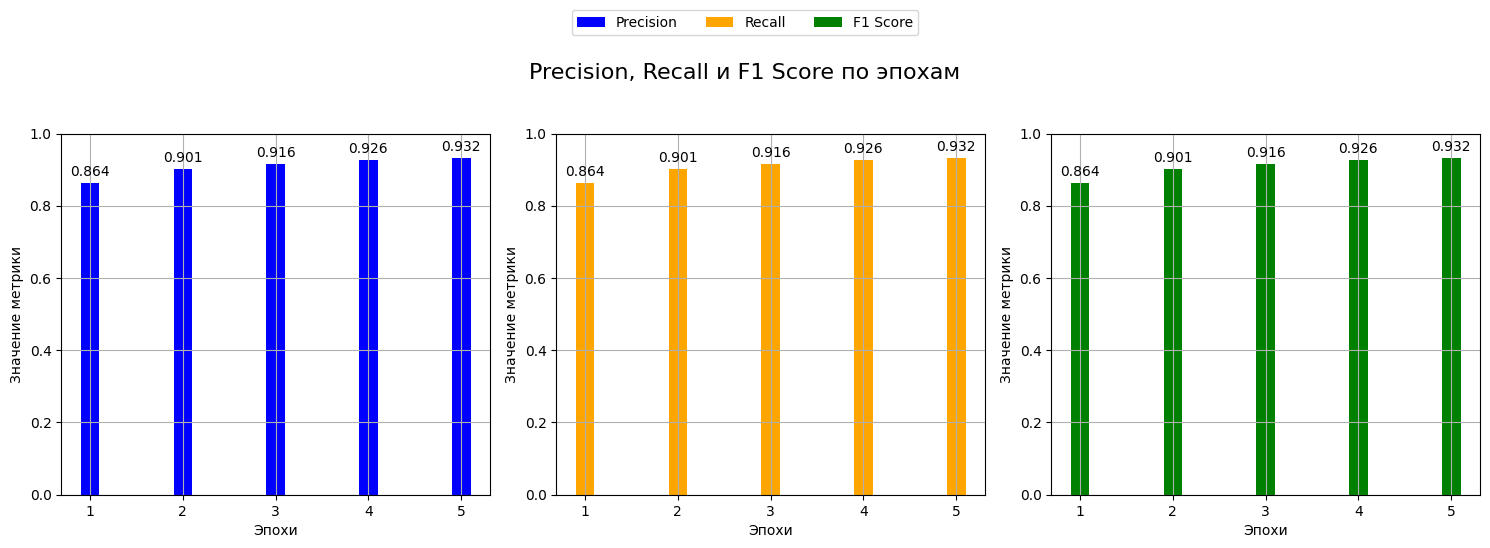

In [70]:
# Метрики NewSigmoidNN
plot_metrics(newsigm_model_results, 5)

### Обучение с использованием SGD:
Создай свою модель и обучи ее, используя стохастический градиентный спуск (SGD). Сравни точность модели по сравнению с применением Adam в качестве оптимизатора.

In [73]:
# Обучение модели. В качестве оптимизатора - SGD (стохастический градиентный спуск)
newsigm_model = NewSigmoidNN(10, 512, 256)

print("Обучение модели NewSigmoidNN с SGD оптимизатором:\n")
newsigm_model_results = train_nn(
    newsigm_model,
    train_dataloader,
    test_dataloader,
    torch.optim.SGD(newsigm_model.parameters(), lr=0.01),
    nn.CrossEntropyLoss()
)

Обучение модели NewSigmoidNN с SGD оптимизатором:



d:\Programming\Coursers_of_programming_2024\Pytorch-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch: 1/5. Loss: 2.302. Pr: 0.07, R: 0.10, F1: 0.05


d:\Programming\Coursers_of_programming_2024\Pytorch-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch: 2/5. Loss: 2.301. Pr: 0.07, R: 0.10, F1: 0.04


d:\Programming\Coursers_of_programming_2024\Pytorch-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch: 3/5. Loss: 2.301. Pr: 0.10, R: 0.10, F1: 0.04
Epoch: 4/5. Loss: 2.299. Pr: 0.11, R: 0.10, F1: 0.04
Epoch: 5/5. Loss: 2.230. Pr: 0.13, R: 0.11, F1: 0.06


По результатам видно, что модель не может перескачить локальный минимум. Для этого попробуем убрать все Сигмоид функции активации из архитектуры модели, напишем класс ReLUNN с наследованием основной части архитектуры от класса NewSigmoidNN

In [76]:
# Заменю функцию активации Sigmoid на ReLU
class ReLUNN(NewSigmoidNN):
    def __init__(self, num_classes, input_features, output_features):
        super().__init__(num_classes, input_features, output_features)

        self.hidden_layers[1] = nn.ReLU()
        self.hidden_layers[3] = nn.ReLU()
        

In [78]:
# Обучение модели. В качестве оптимизатора - SGD (стохастический градиентный спуск)
relu_model = ReLUNN(10, 512, 256)

print("Обучение модели ReLUNN с SGD оптимизатором:\n")
relu_model_results = train_nn(
    relu_model,
    train_dataloader,
    test_dataloader,
    torch.optim.SGD(relu_model.parameters(), lr=0.01),
    nn.CrossEntropyLoss()
)

Обучение модели ReLUNN с SGD оптимизатором:

Epoch: 1/5. Loss: 1.643. Pr: 0.61, R: 0.42, F1: 0.44
Epoch: 2/5. Loss: 0.397. Pr: 0.75, R: 0.65, F1: 0.67
Epoch: 3/5. Loss: 0.248. Pr: 0.80, R: 0.74, F1: 0.76
Epoch: 4/5. Loss: 0.171. Pr: 0.83, R: 0.79, F1: 0.80
Epoch: 5/5. Loss: 0.130. Pr: 0.86, R: 0.83, F1: 0.84


В результате при замене всех Сигмоид функций активации на ReLU модель стала обучаться и даже достигла неплохих результатов, но по сравнению с Adam в качестве оптимизатора результаты стали значительно хуже.

### Регуляризация:
Реализуй технику регуляризации Dropout в своей нейронной сети и сравни результаты с полученными ранее.

Регуляризация с помощью Dropout — это техника, используемая для борьбы с переобучением нейронной сети, путем временного отключения (обнуления) определенного процента нейронов во время обучения. Это помогает избежать чрезмерной зависимости модели от определенных нейронов и поощряет более общее представление.

In [8]:
# Модель без Dropout
class NNwithoutDropOut(nn.Module):
    def __init__(self, n_classes):
        super().__init__()

        # Входной слой
        self.input_layer = nn.Flatten()
        # Скрытые слои
        self.hidden_1_layer = nn.Linear(28 * 28, 512)
        self.hidden_2_layer = nn.Linear(512, 256)

        # Выходной слой
        self.output_layer = nn.Linear(256, n_classes)

    def forward(self, x):
        # Преобразование входных данных (матрица 28х28) в 1D вектор (28 * 28 = 784 признака)
        x = self.input_layer(x)
        
        # Прогон данных через скрытые слои
        x = self.hidden_1_layer(x)
        # Функция активации для скрытого слоя №1
        x = F.relu(x)
        x = self.hidden_2_layer(x)
        # Функция активации для скрытого слоя №2
        x = F.relu(x)
        
        # Пропуск данных через выходной слой
        logits = self.output_layer(x)

        return logits


    
# Модель с Dropout в качестве регуляризации в архитектуре
class NNwithDropOut(NNwithoutDropOut):
    def __init__(self, n_classes):
        super().__init__(n_classes=n_classes)

        # Добавление слоев Dropout
        self.dropout_1 = nn.Dropout(p=0.25)  # Dropout после первого скрытого слоя
        self.dropout_2 = nn.Dropout(p=0.25)  # Dropout после второго скрытого слоя

    def forward(self, x):
        # Используем метод родительского класса для обработки входных данных
        x = self.input_layer(x)
        
        # Прогон данных через скрытые слои
        x = self.hidden_1_layer(x)
        x = F.relu(x)
        x = self.dropout_1(x)  # Применение Dropout после первой активации
        
        x = self.hidden_2_layer(x)
        x = F.relu(x)
        x = self.dropout_2(x)  # Применение Dropout после второй активации
        
        # Пропуск данных через выходной слой
        logits = self.output_layer(x)
        
        return logits



In [39]:
# Без DropOut
model1 = NNwithoutDropOut(10)

# С DropOut
model2 = NNwithDropOut(10)

# Обучение моделей
print("Обучение модели NNwithoutDropOut:\n")
model1_optimizer = torch.optim.Adam(model1.parameters())
model1_criterion = nn.CrossEntropyLoss()
model1_results = train_nn(
    model1,
    train_dataloader,
    test_dataloader,
    model1_optimizer,
    model1_criterion
)


print("=" * 100 + "\n")
print("Обучение модели NNwithDropOut:\n")
model2_optimizer = torch.optim.Adam(model2.parameters())
model2_criterion = nn.CrossEntropyLoss()
model2_results = train_nn(
    model2,
    train_dataloader,
    test_dataloader,
    model2_optimizer,
    model2_criterion
)


Обучение модели NNwithoutDropOut:

Epoch: 1/5. Train Loss: 0.128.  Pr: 0.96, R: 0.96, F1: 0.96
Epoch: 2/5. Train Loss: 0.101.  Pr: 0.96, R: 0.96, F1: 0.96
Epoch: 3/5. Train Loss: 0.076.  Pr: 0.97, R: 0.97, F1: 0.97
Epoch: 4/5. Train Loss: 0.072.  Pr: 0.97, R: 0.97, F1: 0.97
Epoch: 5/5. Train Loss: 0.078.  Pr: 0.97, R: 0.97, F1: 0.97

Обучение модели NNwithDropOut:

Epoch: 1/5. Train Loss: 0.135.  Pr: 0.96, R: 0.96, F1: 0.96
Epoch: 2/5. Train Loss: 0.087.  Pr: 0.97, R: 0.97, F1: 0.97
Epoch: 3/5. Train Loss: 0.091.  Pr: 0.97, R: 0.97, F1: 0.97
Epoch: 4/5. Train Loss: 0.080.  Pr: 0.97, R: 0.97, F1: 0.97
Epoch: 5/5. Train Loss: 0.087.  Pr: 0.97, R: 0.97, F1: 0.97


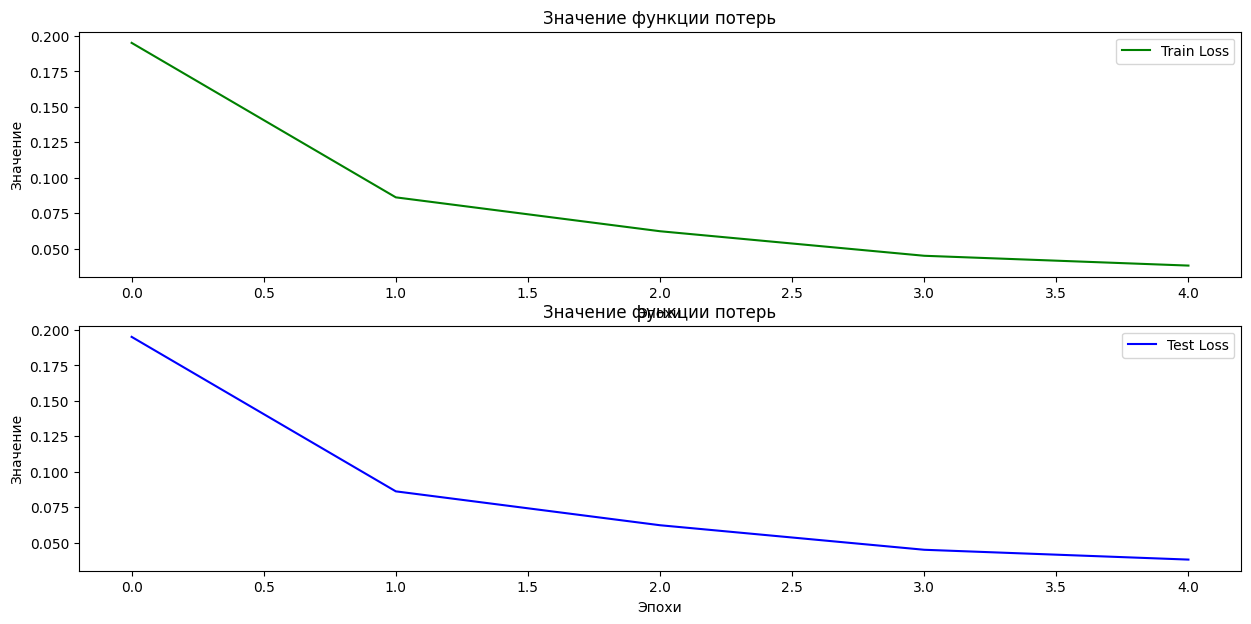

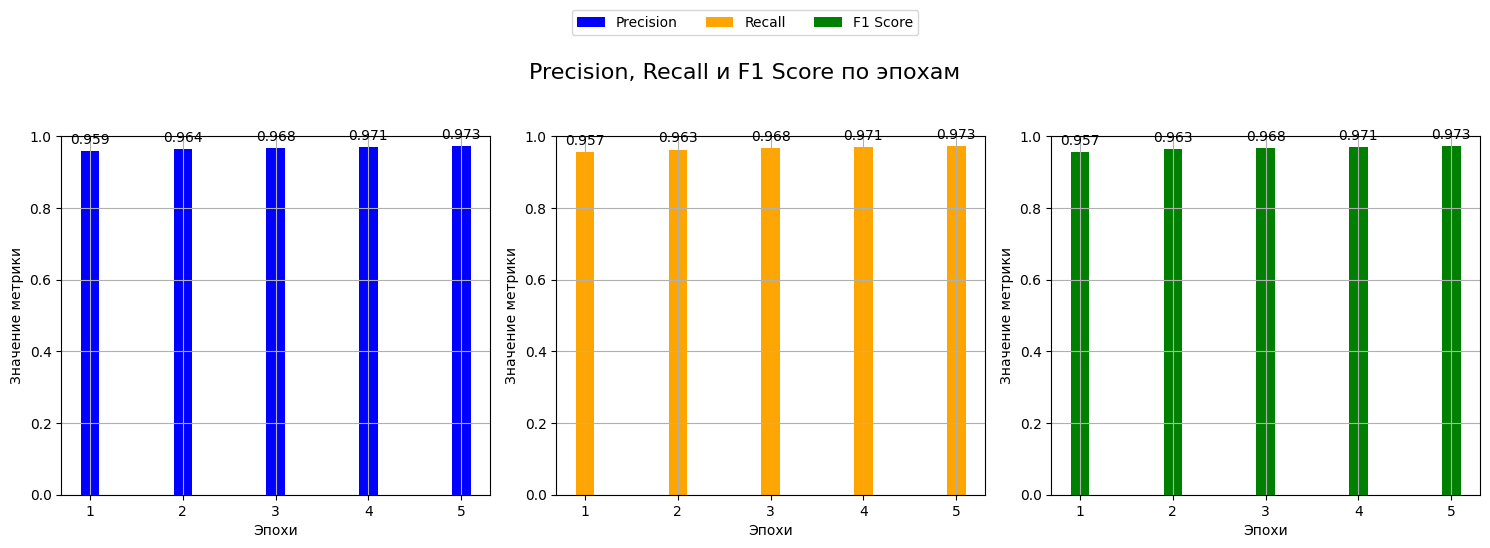

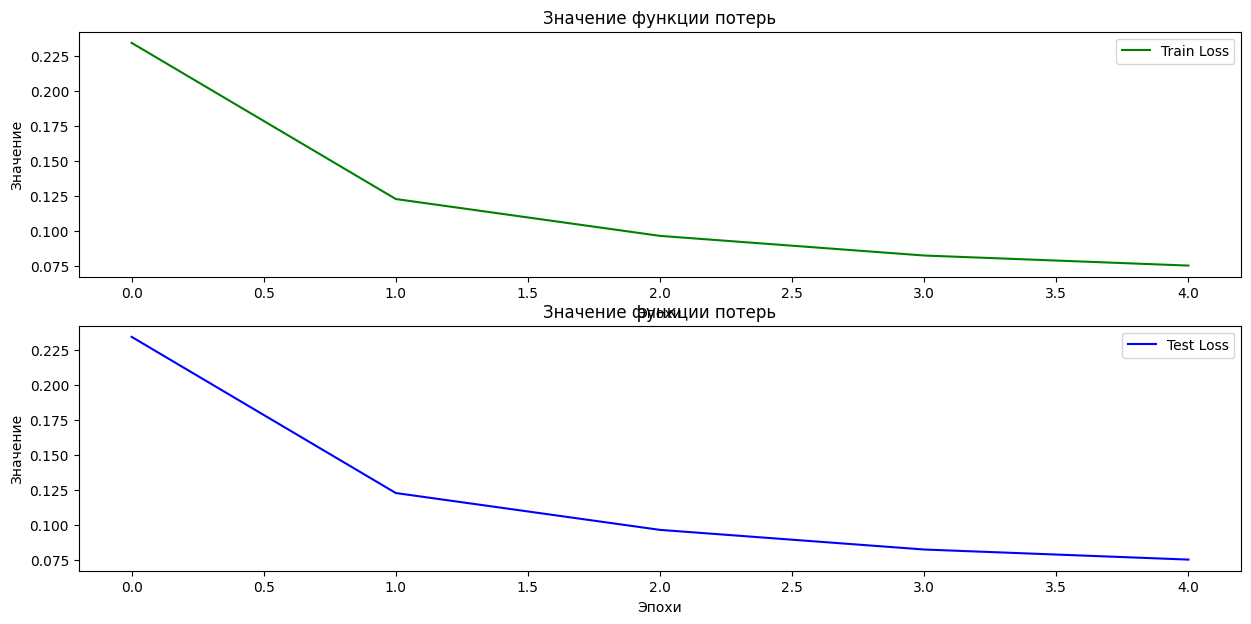

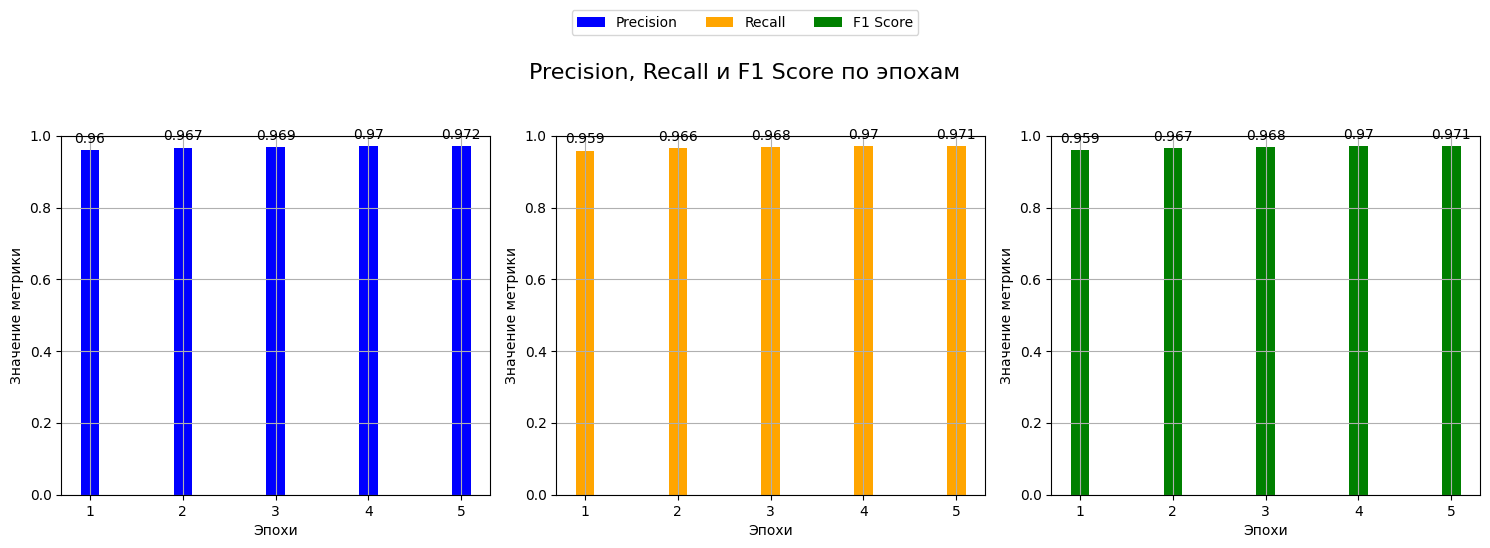

In [40]:
# Визуализация функции потерь и метрик

# Метрики NNwithoutDropOut
plot_results(model1_results)

# Метрики NNwithDropOut
plot_results(model2_results)

**Итог**: модель с регуляризацией с помощью случайного отключения части нейронов через DropOut меньше склонна к переобучению!

### Датасет CIFAR-10:
Загрузите и предобработайте датасет CIFAR-10, реализуй нейронную сеть, используя архитектуру с несколькими слоями.

#### Без предобработки

In [9]:
# Загрузка датасета
train_dataset = datasets.CIFAR10(
    root="../data",
    train=True,
    download=True,
    transform=ToTensor())

test_dataset = datasets.CIFAR10(
    root="../data",
    train=False,
    download=True,
    transform=ToTensor())

100%|██████████| 170M/170M [00:18<00:00, 9.24MB/s] 


Extracting ../data\cifar-10-python.tar.gz to ../data
Files already downloaded and verified


In [14]:
# Определение DataLoaders
train_loader = DataLoader(
    train_dataset,
    batch_size=24,
    shuffle=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=24,
    shuffle=True
)

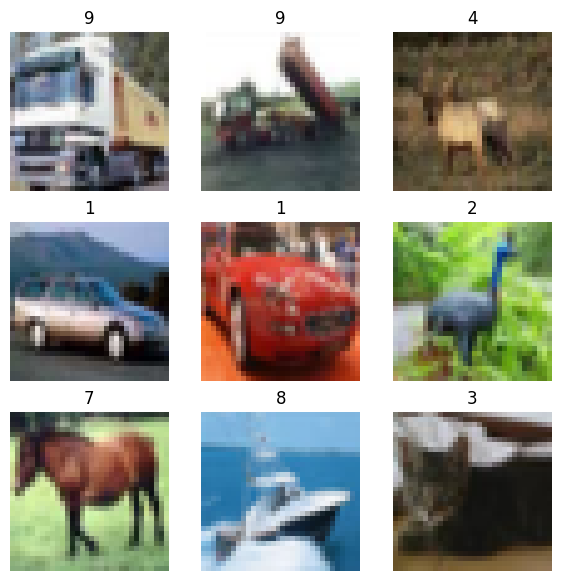

In [31]:
# Визуализация данных
figure = plt.figure(figsize=(7, 7))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    img, label = train_dataset[i]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.moveaxis(0, -1))

plt.show()

In [41]:
# Создание архитектуры нейросети
class CifarNN(nn.Module):
    def __init__(self, n_classes, dropout_p, img_size):
        super().__init__()

        self.input = nn.Flatten()

        self.hidden_layers = nn.Sequential(
            nn.Linear(img_size[0] * img_size[1] * 3, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(dropout_p)    
        )

        self.output = nn.Linear(64, n_classes)
    
    def forward(self, x):
        x = self.input(x)

        x = self.hidden_layers(x)

        logits = self.output(x)

        return logits


In [ ]:
# Обучение модели без предобработки данных (аугментаций)
cifar_model = CifarNN(10, 0.25, (32, 32))

# Обучение моделей
print("Обучение модели CifarNN:\n")
cifar_model_optimizer = torch.optim.Adam(cifar_model.parameters())
cifar_model_criterion = nn.CrossEntropyLoss()
cifar_model_results = train_nn(
    cifar_model,
    train_loader,
    test_loader,
    cifar_model_optimizer,
    cifar_model_criterion
)

Обучение модели CifarNN:

Epoch: 1/5. Train Loss: 1.764.  Pr: 0.37, R: 0.36, F1: 0.35
Epoch: 2/5. Train Loss: 1.669.  Pr: 0.38, R: 0.38, F1: 0.37
Epoch: 3/5. Train Loss: 1.618.  Pr: 0.38, R: 0.39, F1: 0.38
Epoch: 4/5. Train Loss: 1.595.  Pr: 0.39, R: 0.40, F1: 0.39
Epoch: 5/5. Train Loss: 1.548.  Pr: 0.40, R: 0.41, F1: 0.40


#### Обучение после обработки данных и аугментации

In [45]:
# Преобразования датасета CIFAR10
# Аугментация и предобработка датасета для последующего обучения модели
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=2),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Для преобразования данных в подходящий формат после того, как нейросеть обучится на train data
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

In [47]:
# Загрузка датасетов и их предобработка (+ аугментация)
train_dataset = datasets.CIFAR10(
    root="../data",
    train=True,
    download=True,
    transform=transform)

test_dataset = datasets.CIFAR10(
    root="../data",
    train=False,
    download=True,
    transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [48]:
# Определение DataLoaders
train_loader = DataLoader(
    train_dataset,
    batch_size=24,
    shuffle=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=24,
    shuffle=True
)

In [49]:
# Создание классической CNN - Convolutional Neaural Network
class CifarCNN(nn.Module):
    def __init__(self, n_classes, dropout_p):
        super().__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1), # Сверточный слой
            nn.ReLU(), # Избавляемся от нелинейности в данных
            nn.MaxPool2d(kernel_size=2, stride=2), # Пуллинг для уменьшения размерности выходного вектора   
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        # Полносвязные слои (Fully Conected Layers)
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 256),
            nn.ReLU(),
            nn.Dropout(dropout_p),
            nn.Linear(256, n_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)

        logits = self.fc_layers(x)

        return logits
    

In [50]:
# Обучение модели после предобработки данных (аугментаций)
cifar_cnn_model = CifarCNN(10, 0.25)

# Обучение моделей
print("Обучение модели CifarCNN:\n")
cifar_cnn_model_optimizer = torch.optim.Adam(cifar_cnn_model.parameters())
cifar_cnn_model_criterion = nn.CrossEntropyLoss()
cifar_cnn_model_results = train_nn(
    cifar_cnn_model,
    train_loader,
    test_loader,
    cifar_cnn_model_optimizer,
    cifar_cnn_model_criterion
)

Обучение модели CifarCNN:

Epoch: 1/5. Train Loss: 1.060.  Pr: 0.63, R: 0.62, F1: 0.61
Epoch: 2/5. Train Loss: 0.937.  Pr: 0.65, R: 0.65, F1: 0.64
Epoch: 3/5. Train Loss: 0.840.  Pr: 0.66, R: 0.67, F1: 0.66
Epoch: 4/5. Train Loss: 0.810.  Pr: 0.68, R: 0.68, F1: 0.67
Epoch: 5/5. Train Loss: 0.804.  Pr: 0.69, R: 0.69, F1: 0.68


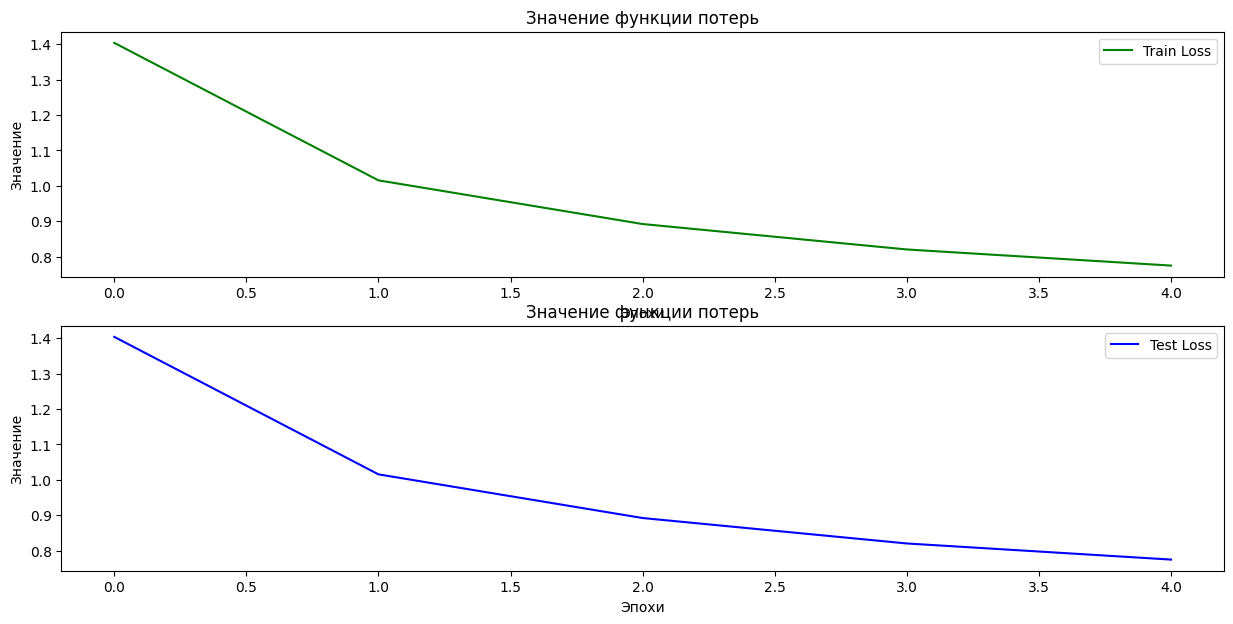

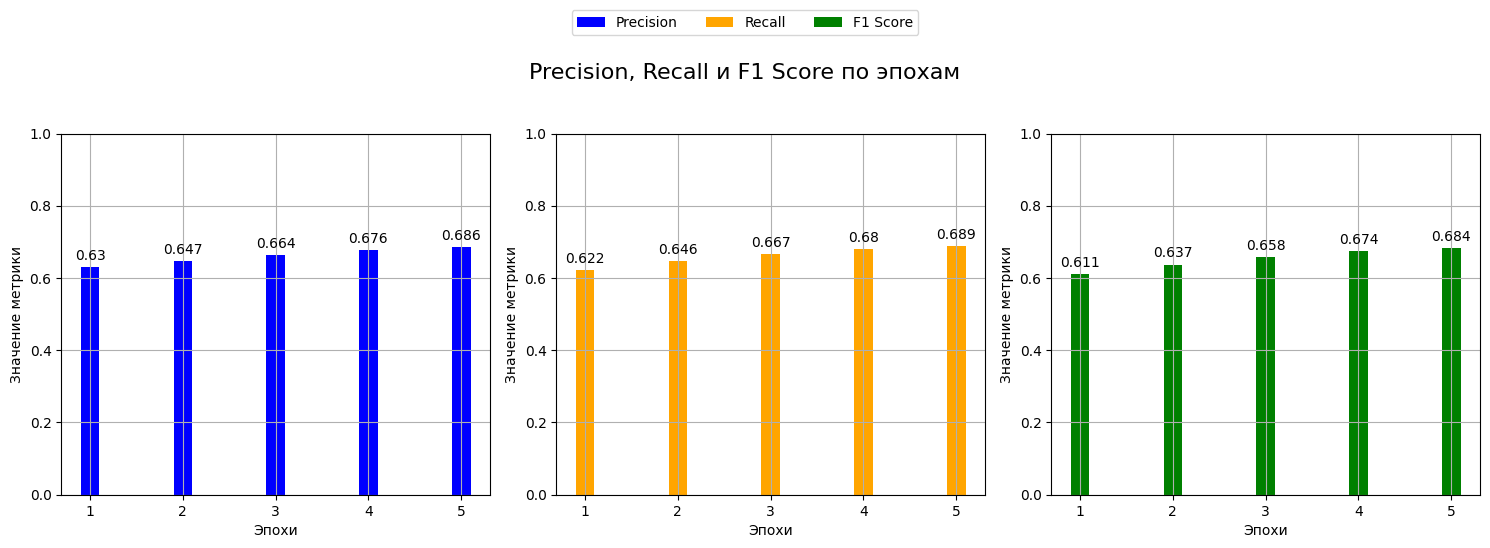

In [51]:
plot_results(cifar_cnn_model_results)

**Результат**: после предобработки данных + аугментаций, а также добавив в архитектуру нейросети сверточные слои для выявления признаков изображений результаты обучения выросли на ~30%!

### Переобучение:
Намеренно создай переобученную модель, используя небольшое количество эпох для обучения, а затем продемонстрируй, как использовать валидационный набор для уменьшения переобучения.

In [55]:
# Работа с датасетом MNIST
# Архитектура нейросети - FCNN (Fully Connected Neaural Network)
class SimpleNN(nn.Module):
    def __init__(self, n_classes=10, img_size=(28, 28)):
        super().__init__()

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(img_size[0] * img_size[1], 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, n_classes)
        )

    def forward(self, x):
        logits = self.fc_layers(x)

        return logits
    

In [61]:
# Обучение нейросети - Специально переобучаем ее
# Обучение модели без предобработки данных (аугментаций)
model = SimpleNN()

# Обучение моделей
print("Обучение модели SimpleNN:\n")
model_optimizer = torch.optim.Adam(model.parameters())
model_criterion = nn.CrossEntropyLoss()
model_results = train_nn(
    model,
    train_dataloader,
    test_dataloader,
    model_optimizer,
    model_criterion,
    num_epochs=30
)


Обучение модели SimpleNN:

Epoch: 1/30. Train Loss: 0.111.  Pr: 0.97, R: 0.97, F1: 0.97
Epoch: 2/30. Train Loss: 0.100.  Pr: 0.97, R: 0.97, F1: 0.97
Epoch: 3/30. Train Loss: 0.085.  Pr: 0.97, R: 0.97, F1: 0.97
Epoch: 4/30. Train Loss: 0.095.  Pr: 0.97, R: 0.97, F1: 0.97
Epoch: 5/30. Train Loss: 0.091.  Pr: 0.97, R: 0.97, F1: 0.97
Epoch: 6/30. Train Loss: 0.086.  Pr: 0.97, R: 0.97, F1: 0.97
Epoch: 7/30. Train Loss: 0.080.  Pr: 0.97, R: 0.97, F1: 0.97
Epoch: 8/30. Train Loss: 0.102.  Pr: 0.98, R: 0.98, F1: 0.98
Epoch: 9/30. Train Loss: 0.100.  Pr: 0.98, R: 0.98, F1: 0.98
Epoch: 10/30. Train Loss: 0.098.  Pr: 0.98, R: 0.98, F1: 0.98
Epoch: 11/30. Train Loss: 0.108.  Pr: 0.98, R: 0.98, F1: 0.98
Epoch: 12/30. Train Loss: 0.140.  Pr: 0.98, R: 0.98, F1: 0.98
Epoch: 13/30. Train Loss: 0.103.  Pr: 0.98, R: 0.98, F1: 0.98
Epoch: 14/30. Train Loss: 0.130.  Pr: 0.98, R: 0.98, F1: 0.98
Epoch: 15/30. Train Loss: 0.143.  Pr: 0.98, R: 0.98, F1: 0.98
Epoch: 16/30. Train Loss: 0.109.  Pr: 0.98, R: 0.98,

**Результат**: Модель переобучилась! Так как функция потерь на выборке данных сначала уменьшалась но с 8 эпохи она стала расти, что говорит о переобучении

Одним из вариантов предупреждения переобучения является метод Early Stopping (раняя остановка) - модель прекращает обучение как только значение функции потерь станет увеличиваться на валидационной выборке.

In [64]:
# Обучение с Early Stopping Method
num_epochs = 30
best_val_loss = float('inf')
early_stopping_counter = 0
patience = 3

model = SimpleNN()
# Перевод модели на CUDA (GPU)
model.to(device)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()


print("Обучение модели SimpleNN с Early Stopping:\n")
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    # Обучение
    for data, targets in train_dataloader:
        # Перевод данных и меток на CUDA (GPU)
        data = data.to(device)
        targets = targets.to(device)

        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    # Валидация
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for data, targets in test_dataloader:
            data = data.to(device)
            targets = targets.to(device)
            
            outputs = model(data)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)
    avg_val_loss = val_loss / len(test_dataloader)

    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {avg_train_loss:.3f}, Val Loss: {avg_val_loss:.3f}")

    # Условие для раннего прекращения - Early Stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        early_stopping_counter = 0
        # Сохранение лучшей модели
        # torch.save(model.state_dict(), 'best_model.pth')
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= patience:
            print("Сработала ранняя остановка. Обучение прекращено.")
            break

Обучение модели SimpleNN с Early Stopping:

Epoch [1/30], Train Loss: 0.395, Val Loss: 0.098
Epoch [2/30], Train Loss: 0.169, Val Loss: 0.097
Epoch [3/30], Train Loss: 0.122, Val Loss: 0.089
Epoch [4/30], Train Loss: 0.092, Val Loss: 0.106
Epoch [5/30], Train Loss: 0.078, Val Loss: 0.076
Epoch [6/30], Train Loss: 0.065, Val Loss: 0.086
Epoch [7/30], Train Loss: 0.057, Val Loss: 0.080
Epoch [8/30], Train Loss: 0.049, Val Loss: 0.089
Сработала ранняя остановка. Обучение прекращено.
